In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import FuncionEstacionalizar
from openpyxl import load_workbook
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
from scipy.stats import norm
import matplotlib as mpl
import Concluir
mpl.rcParams['legend.numpoints'] = 1
norm = StandardScaler() 
plt.ion()

In [2]:
df = pd.read_excel('AC_PRIN.xlsx', sheet_name='Matriz',header=0,decimal=',') #header 1 = 5ev5
print(df.columns)

Index(['Unnamed: 0', 'Energía (kWh)', 'Hora', 'Mes', 'Día Semana',
       'Laboralidad', 'Potencia [kW]', 'L', 'M', 'M.1', 'J', 'V', 'S', 'D',
       'E', 'F', 'M.2', 'A', 'M.3', 'J.1', 'J.2', 'A.1', 'S.1', 'O', 'N',
       'D.1', 'L ', 'SL', 'NL', 'Tipo de día', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32'],
      dtype='object')


In [3]:
No_dias=round(df['Potencia [kW]'].shape[0]/96)   ##cuando el data set no acabe en un dia completo -1 (5EV5)
ilab=1          #Indice de laboralidad (0 - no laborable, 1 - laborable)
UmbClus=0.2         #umbral para clusterizar datos
DiaAnal=3
print(No_dias)

371


In [4]:
dataset = np.zeros((No_dias,96))
MES= np.zeros((No_dias,12))
DIA = np.zeros((No_dias,7))
HORA = np.zeros(No_dias)
LAB = np.zeros((No_dias,3))
FECHA = np.empty(No_dias,dtype='datetime64[s]')
aux=0
for i in range(No_dias):
        dataset[i]=df['Potencia [kW]'][aux*96:((aux+1)*96)]
        MES[i]=df.iloc[aux*96,14:14+12]
        DIA[i]=df.iloc[aux*96,7:7+7]
        HORA[i]=df.iloc[aux*96,2:3]
        LAB[i]=df.iloc[aux*96,26:29]
        FECHA[i]=np.datetime64(df['Unnamed: 0'][aux*96])
        aux=aux+1

In [5]:
print(dataset.shape,round(df['Potencia [kW]'].shape[0]/96))

(371, 96) 371


In [6]:
Pprom = np.zeros(No_dias)
Pmax = np.zeros(No_dias)
Pmin = np.zeros(No_dias)
for i in range(No_dias):
    Pprom[i]=np.mean(dataset[i][:])
    Pmax[i]=np.max(dataset[i][:])
    Pmin[i]=np.min(dataset[i][:])

In [7]:
MPN = np.append(dataset,Pmax.reshape((No_dias,1)),axis=1) #MATRIZ A SER NORMALIZADA
MPN = np.append(MPN,Pprom.reshape((No_dias,1)),axis=1) #MATRIZ A SER NORMALIZADA
MPN = np.append(MPN,Pmin.reshape((No_dias,1)),axis=1) #MATRIZ A SER NORMALIZADA
norm = StandardScaler()             #media 0 y desviacion estandar de uno
#NMATRIZ = norm.fit_transform(MATRIZ)
NMATRIZ = MPN #HABILITAR ESTA Y DESHABILITAR LA LINEA ANTERIOR
TOTAL = np.concatenate((NMATRIZ,MES,DIA,LAB,FECHA.astype("float").reshape(No_dias,1)),axis=1) ### falta la fecha

In [8]:
(NMATRIZ.shape,MES.shape)

((371, 99), (371, 12))

In [9]:
ncTOTAL=TOTAL.shape[1]

In [10]:
Ndias=np.sum(DIA,axis=0).astype(int)
#CREAMOS 7 MATRICES CADA UNA PARA DIA DE LA SEMANA
LUNES=np.zeros(shape=(Ndias[0],ncTOTAL))
LUNESA=np.zeros(shape=(Ndias[0],ncTOTAL-23))

l=0
ila=0 #INDICE DEL LUNES ANALIZADO

MARTES=np.zeros(shape=(Ndias[1],ncTOTAL))
MARTESA=np.zeros(shape=(Ndias[1],ncTOTAL-23))

m=0
ima=0   #INDICE DEL MARTES ANALIZADO
MIERCOLES=np.zeros(shape=(Ndias[2],ncTOTAL))
MIERCOLESA=np.zeros(shape=(Ndias[2],ncTOTAL-23))
mi=0
imia=0
JUEVES=np.zeros(shape=(Ndias[3],ncTOTAL))
JUEVESA=np.zeros(shape=(Ndias[3],ncTOTAL-23))
ju=0
ijua=0
VIERNES=np.zeros(shape=(Ndias[4],ncTOTAL))
VIERNESA=np.zeros(shape=(Ndias[4],ncTOTAL-23))
v=0
iva=0
SABADO=np.zeros(shape=(Ndias[5],ncTOTAL))
SABADOA=np.zeros(shape=(Ndias[5],ncTOTAL-23))
s=0
isa=0
DOMINGO=np.zeros(shape=(Ndias[6],ncTOTAL))
DOMINGOA=np.zeros(shape=(Ndias[6],ncTOTAL-23))
do=0
idoa=0

In [11]:
# PROCEDIMIENTO PARA SEPARAR DIAS DE LA SEMANA LUNES 118 COLS MPNLUNES 96 COLS
for i in range(No_dias):
    
    if TOTAL[i][111]==1:
        LUNES[l][:]=TOTAL[i][:]
        if (ilab==1):
            if (LUNES[l][118]==1):
                LUNESA[ila][:]=TOTAL[i][0:ncTOTAL-23] #Es laborable
                #plt.figure("Lunes Laborable")
                #plt.plot(LUNESA[ila][:])
                ila=ila+1
        elif (ilab==0):
            if (LUNES[l][120]==1):
                LUNESA[ila][:]=TOTAL[i][0:ncTOTAL-23]
                #plt.figure("Lunes NO Laborable")
                #plt.plot(LUNESA[ila][:])
                ila=ila+1
        l=l+1
        #plt.figure("Lunes")        
        #plt.plot(MATRIZ[i][:])
        
    elif TOTAL[i][112]==1:
        MARTES[m][:]=TOTAL[i][:]
        if (ilab==1):
            if (MARTES[m][118]==1):
                MARTESA[ima][:]=TOTAL[i][0:ncTOTAL-23] #Es laborable 
                #plt.figure("Martes laborable")
                #plt.plot(MARTESA[ima][:])
                ima=ima+1
        elif (ilab==0):
            if (MARTES[m][120]==1):
                MARTESA[ima][:]=TOTAL[i][0:ncTOTAL-23]                
                #plt.figure("Martes NO laborable")
                #plt.plot(MARTESA[ima][:])
                ima=ima+1
        m=m+1
        #plt.figure("Martes")
        #plt.plot(MATRIZ[i][:])
        
    elif TOTAL[i][113]==1:
        MIERCOLES[mi][:]=TOTAL[i][:]
        if (ilab==1):
            if (MIERCOLES[mi][118]==1):
                MIERCOLESA[imia][:]=TOTAL[i][0:ncTOTAL-23]
                #plt.figure("Miercoles Laborable")
                #plt.plot(MIERCOLESA[imia][:])
                imia=imia+1
        elif (ilab==0):
            if (MIERCOLES[mi][120]==1):
                MIERCOLESA[imia][:]=TOTAL[i][0:ncTOTAL-23]                
           #     plt.figure("Miercoles NO laborable")
            #    plt.plot(MIERCOLESA[ima][:])
                ima=ima+1
        mi=mi+1
        #plt.figure("Miercoles")        
        #plt.plot(MATRIZ[i][:])
        
    elif TOTAL[i][114]==1:
        JUEVES[ju][:]=TOTAL[i][:]
        if (ilab==1):
            if (JUEVES[ju][118]==1):
                JUEVESA[ijua][:]=TOTAL[i][0:ncTOTAL-23]
                #plt.figure("Jueves Laborable")
                #plt.plot(JUEVESA[ijua][:])
                ijua=ijua+1
        elif (ilab==0):
            if (JUEVES[ju][120]==1):
                JUEVESA[ijua][:]=TOTAL[i][0:ncTOTAL-23]
                ijua=ijua+1
        ju=ju+1
        #plt.figure("Jueves")        
        #plt.plot(MATRIZ[i][:])
    elif TOTAL[i][115]==1:
        VIERNES[v][:]=TOTAL[i][:]
        if (ilab==1):
            if (VIERNES[v][118]==1):
                VIERNESA[iva][:]=TOTAL[i][0:ncTOTAL-23]
                iva=iva+1
        elif (ilab==0):
            if (VIERNES[v][120]==1):
                VIERNESA[iva][:]=TOTAL[i][0:ncTOTAL-23]
                iva=iva+1
        v=v+1     
        #plt.figure("Viernes")        
        #plt.plot(MATRIZ[i][:])
    elif TOTAL[i][116]==1:
        SABADO[s][:]=TOTAL[i][:]
        if (ilab==1):# Para cuestiones de prueba se  intercambio con el de abajo son los laborables aqui va 1 se intercambia cuando con datos de la U porque los sabados se trabaja
            if (SABADO[s][118]==1):
                SABADOA[isa][:]=TOTAL[i][0:ncTOTAL-23]
                isa=isa+1
        elif (ilab==0): # Para cuestiones de prueba se  intercambio con el de abajo son los no laborables aqui va 0 se intercambia cuando con datos de la U porque los sabados se trabaja
            if (SABADO[s][120]==1):
                SABADOA[isa][:]=TOTAL[i][0:ncTOTAL-23]
                isa=isa+1
        s=s+1
        #plt.figure("Sabado")        
        #plt.plot(MATRIZ[i][:])
    elif TOTAL[i][117]==1:
        DOMINGO[do][:]=TOTAL[i][:]
        if (ilab==0): #Para cuestiones de prueba se  intercambio con el de abajo son los laborables aqui va 1
            if (DOMINGO[do][118]==1):
                DOMINGOA[idoa][:]=TOTAL[i][0:ncTOTAL-23]
                idoa=idoa+1
        elif (ilab==1): #Para cuestiones de prueba se  intercambio con el de abajo son los laborables aqui va 0
            if (DOMINGO[do][120]==1):
                DOMINGOA[idoa][:]=TOTAL[i][0:ncTOTAL-23]
                idoa=idoa+1
        do=do+1        
        #plt.figure("Domingo")        
        #plt.plot(MATRIZ[i][:])
    else:
        print("Error groso")


In [12]:
MPNLUNES=np.zeros(shape=(ila,ncTOTAL-23))
MPNLUNES=LUNESA[0:ila][0:ncTOTAL-23] 

MPNMARTES=np.zeros(shape=(ima,ncTOTAL-23))
MPNMARTES=MARTESA[0:ima][0:ncTOTAL-23]
  
MPNMIERCOLES=np.zeros(shape=(imia,ncTOTAL-23))
MPNMIERCOLES=MIERCOLESA[0:imia][0:ncTOTAL-23]

MPNJUEVES=np.zeros(shape=(ijua,ncTOTAL-23))
MPNJUEVES=JUEVESA[0:ijua][0:ncTOTAL-23]

MPNVIERNES=np.zeros(shape=(iva,ncTOTAL-23))
MPNVIERNES=VIERNESA[0:iva][0:ncTOTAL-23]

MPNSABADO=np.zeros(shape=(isa,ncTOTAL-23))
MPNSABADO=SABADOA[0:isa][0:ncTOTAL-23]#MPNSABADO=SABADOA[0:isa][0:ncTOTAL-23]

MPNDOMINGO=np.zeros(shape=(idoa,ncTOTAL-23))
MPNDOMINGO=DOMINGOA[0:idoa][0:ncTOTAL-23]

In [13]:
# PROCEDIMIENTO PARA VERIFICAR SI LOS DATOS TIENEN UNA DISTRIBUCION NORMAL Y DETECCIoN DE ANOMALiAS
#LMM = np.concatenate((MPNMARTES,MPNMIERCOLES,MPNJUEVES),axis=0)
#DETAN=LMM
for cdpd in range (7): #cdpd contador de dias para la deteccion de anomalias
    if (cdpd==0):
        DETAN=MPNLUNES
    elif (cdpd==1):
        DETAN=MPNMARTES
    elif (cdpd==2):
        DETAN=MPNMIERCOLES
    elif (cdpd==3):
        DETAN=MPNJUEVES
    elif (cdpd==4):
        DETAN=MPNVIERNES
    elif (cdpd==5):
        DETAN=MPNSABADO
    elif (cdpd==6):
        DETAN=MPNDOMINGO
    print("el numero del dia en analisis es", cdpd,)

    nDETAN=DETAN.shape[0]   #No de filas del dia en analisis
    ncDETAN=DETAN.shape[1]  #No de columnas del dia en analisis
    DETANSO=np.zeros(shape=(nDETAN,ncDETAN))  #MATRIZ QUE ALMACENARa LOS DIAS SIN OUTLIERS
    DETANO=np.zeros(shape=(nDETAN,ncDETAN))   #MATRIZ QUE ALMACENA 1s O 0s UN 1 contiene outlier y 0 no lo tiene
    DETANCO=np.zeros(shape=(nDETAN,ncDETAN))  #MATRIZ QUE ALMACENARa LOS DIAS CON OUTLIERS
    SOD=np.zeros(shape=(nDETAN,1))        # SOD (Suma de Outliers Detection)

    #for i in range (nDETAN):               # PARA GRAFICAR TODOS LOS DIAS SIN NORMALIZAR
     #   plt.figure("DIA EN ANaLISIS SIN NORMALIZAR")        
      #  plt.plot(DETAN[i][:])

    hh=48    #HORA PARA GRAFICAR EL HISTOGRAMA
    #pval=1  #QUITAR Y HABILITAR LAS DOS LINEAS SIGUIENTES
#    plt.figure("Histograma Laborables sin normalizar", cdpd,")  
#    plt.hist(DETAN.T[:][hh], bins = 20)
    print(st.mstats.normaltest(DETAN.T[:][hh]))
    z,pval= st.mstats.normaltest(DETAN.T[:][hh])
    if (pval < 0.055):
        print("Not normal distribution")
    else:
        print("Los datos tienen distribucion normal")
# DETECCIoN DE ANOMALiAS

    DETANN = norm.fit_transform(DETAN)
#    for i in range (nDETAN):
#        plt.figure("DIAS EN ANaLISIS NORMALIZADO")        
#        plt.plot(DETANN[i][:])

    for ch in range (98):       #ch es el contador de horas
        for i in range (nDETAN):
    
            if (abs(DETANN[i][ch])<1.96):
                DETANO[i][ch]=0
            else:
                DETANO[i][ch]=1

    for i in range (nDETAN):
        SOD[i][0]=np.sum(DETANO[i][:])

    cout=0 #Contador de outliers
    cnorm=0 #Contador de valores normales

    for i in range (nDETAN):
        if (SOD[i][0]>0):                       #0 NO ACEPTA NINGUN DATO ATIPICO 1 ACEPTA UN DATO ATIPICO
            DETANCO[cout][:]=DETAN[i][:]
#            plt.figure("DIAS EN ANaLISIS ATIPICOS")        
#            plt.plot(DETANCO[cout][:])
            cout=cout+1
        else:
            DETANSO[cnorm][:]=DETAN[i][:]
#            plt.figure("DIAS EN ANaLISIS TIPICOS")        
#            plt.plot(DETANSO[cnorm][:])
            cnorm=cnorm+1
        
    if (cdpd==0):
        global LDETANCO, LDETANSO
        LDETANSO=np.zeros(shape=(cnorm,DETANSO.shape[1]))  #Matriz con el tamano justo que contiene los valores tipos de un dia lunes
        LDETANSO=DETANSO[0:cnorm][:]
        MLUNES=np.zeros(shape=(LDETANSO.shape[1],1))     #Matriz que almacenara la media
        DSLUNES=np.zeros(shape=(LDETANSO.shape[1],1))    #Matriz que almacenara la desviacion estandar
        LDETANCO=DETANCO[0:cout][:]
#        PLUNESN=norm.fit_transform(LDETANSO)
        for i in range (DETANSO.shape[1]):
            MLUNES[i][0]=np.mean(LDETANSO.T[i][:])
            DSLUNES[i][0]=np.std(LDETANSO.T[i][:])
#       
    elif (cdpd==1):
        global MDETANCO, MDETANSO
        MDETANSO=np.zeros(shape=(cnorm,DETANSO.shape[1]))  #Matriz con el tamano justo que contiene los valores tipos de un dia lunes
        MDETANSO=DETANSO[0:cnorm][:]
        MMARTES=np.zeros(shape=(MDETANSO.shape[1],1))     #Matriz que almacenara la media
        DSMARTES=np.zeros(shape=(MDETANSO.shape[1],1))    #Matriz que almacenara la desviacion estandar
        MDETANCO=DETANCO[0:cout][:]
 #       PMARTESN=norm.fit_transform(MDETANSO)
        for i in range (DETANSO.shape[1]):
            MMARTES[i][0]=np.mean(MDETANSO.T[i][:])
            DSMARTES[i][0]=np.std(MDETANSO.T[i][:])

    elif (cdpd==2):
        global MIDETANCO, MIDETANSO
        MIDETANSO=np.zeros(shape=(cnorm,DETANSO.shape[1]))  #Matriz con el tamano justo que contiene los valores tipos de un dia lunes
        MIDETANSO=DETANSO[0:cnorm][:]
        MMIERCOLES=np.zeros(shape=(MIDETANSO.shape[1],1))     #Matriz que almacenara la media
        DSMIERCOLES=np.zeros(shape=(MIDETANSO.shape[1],1))    #Matriz que almacenara la desviacion estandar
        MIDETANCO=DETANCO[0:cout][:]
  #      PMIERCOLESN=norm.fit_transform(MIDETANSO)
        for i in range (DETANSO.shape[1]):
            MMIERCOLES[i][0]=np.mean(MIDETANSO.T[i][:])
            DSMIERCOLES[i][0]=np.std(MIDETANSO.T[i][:])           
    elif (cdpd==3):
            
        global JDETANCO, JDETANSO
        JDETANSO=np.zeros(shape=(cnorm,DETANSO.shape[1]))  #Matriz con el tamano justo que contiene los valores tipos de un dia lunes
        JDETANSO=DETANSO[0:cnorm][:]
        MJUEVES=np.zeros(shape=(JDETANSO.shape[1],1))     #Matriz que almacenara la media
        DSJUEVES=np.zeros(shape=(JDETANSO.shape[1],1))    #Matriz que almacenara la desviacion estandar
        JDETANCO=DETANCO[0:cout][:]
   #     PJUEVESN=norm.fit_transform(JDETANSO)
        for i in range (DETANSO.shape[1]):
            MJUEVES[i][0]=np.mean(JDETANSO.T[i][:])
            DSJUEVES[i][0]=np.std(JDETANSO.T[i][:])
   
    elif (cdpd==4):
        global VDETANCO, VDETANSO
        VDETANSO=np.zeros(shape=(cnorm,DETANSO.shape[1]))  #Matriz con el tamano justo que contiene los valores tipos de un dia lunes
        VDETANSO=DETANSO[0:cnorm][:]
        MVIERNES=np.zeros(shape=(VDETANSO.shape[1],1))     #Matriz que almacenara la media
        DSVIERNES=np.zeros(shape=(VDETANSO.shape[1],1))    #Matriz que almacenara la desviacion estandar
        VDETANCO=DETANCO[0:cout][:]
    #    PVIERNESN=norm.fit_transform(VDETANSO)
        for i in range (DETANSO.shape[1]):
            MVIERNES[i][0]=np.mean(VDETANSO.T[i][:])
            DSVIERNES[i][0]=np.std(VDETANSO.T[i][:])
       
    elif (cdpd==5):
        global SDETANCO, SDETANSO
        SDETANSO=np.zeros(shape=(cnorm,DETANSO.shape[1]))  #Matriz con el tamano justo que contiene los valores tipos de un dia lunes
        SDETANSO=DETANSO[0:cnorm][:]
        MSABADO=np.zeros(shape=(SDETANSO.shape[1],1))     #Matriz que almacenara la media
        DSSABADO=np.zeros(shape=(SDETANSO.shape[1],1))    #Matriz que almacenara la desviacion estandar
        SDETANCO=DETANCO[0:cout][:]
    #    PVIERNESN=norm.fit_transform(VDETANSO)
        for i in range (DETANSO.shape[1]):
            MSABADO[i][0]=np.mean(SDETANSO.T[i][:])
            DSSABADO[i][0]=np.std(SDETANSO.T[i][:])     
        
    elif (cdpd==6):
        global DDETANCO, DDETANSO
        DDETANSO=np.zeros(shape=(cnorm,DETANSO.shape[1]))  #Matriz con el tamano justo que contiene los valores tipos de un dia lunes
        DDETANSO=DETANSO[0:cnorm][:]
        MDOMINGO=np.zeros(shape=(DDETANSO.shape[1],1))     #Matriz que almacenara la media
        DSDOMINGO=np.zeros(shape=(DDETANSO.shape[1],1))    #Matriz que almacenara la desviacion estandar
        DDETANCO=DETANCO[0:cout][:]

        for i in range (DETANSO.shape[1]):
            MDOMINGO[i][0]=np.mean(DDETANSO.T[i][:])
            DSDOMINGO[i][0]=np.std(DDETANSO.T[i][:])

    print ("El numero de outliers es")
    print (cout)
    print ("El numero de datos normales")
    print (cnorm)

el numero del dia en analisis es 0
NormaltestResult(statistic=19.238911830386215, pvalue=6.642374797529701e-05)
Not normal distribution
El numero de outliers es
19
El numero de datos normales
29
el numero del dia en analisis es 1
NormaltestResult(statistic=17.223082575449173, pvalue=0.00018199319026304661)
Not normal distribution
El numero de outliers es
19
El numero de datos normales
32
el numero del dia en analisis es 2
NormaltestResult(statistic=44.179622388546946, pvalue=2.5498632637326295e-10)
Not normal distribution
El numero de outliers es
20
El numero de datos normales
33
el numero del dia en analisis es 3
NormaltestResult(statistic=37.81811820062471, pvalue=6.136206618362675e-09)
Not normal distribution
El numero de outliers es
17
El numero de datos normales
35
el numero del dia en analisis es 4
NormaltestResult(statistic=20.04293328859274, pvalue=4.443573169395038e-05)
Not normal distribution
El numero de outliers es
20
El numero de datos normales
30
el numero del dia en anal

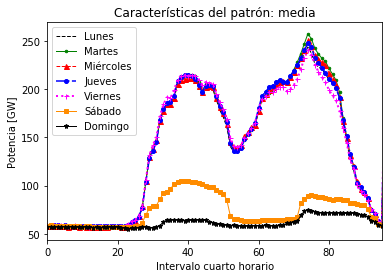

In [14]:
plt.figure("PATRON PROMEDIO")
#plt.title('Pattern features: daily mean power')
plt.title('Características del patrón: media')
#plt.xlabel("15 minutes interval")
plt.xlabel("Intervalo cuarto horario")
plt.xscale('linear')
plt.ylabel("Potencia [GW]")
plt.yscale('linear')
plt.xlim(0,95.05)

plt.plot(MLUNES, color='black', linestyle='dashed', linewidth=1, marker='', markerfacecolor='black', markersize=2.5)
plt.plot(MMARTES, color='green', linestyle='solid', linewidth=1, marker='.', markerfacecolor='green', markersize=5)
plt.plot(MMIERCOLES, color='red', linestyle='dashed', linewidth=1, marker='^', markerfacecolor='red', markersize=5)
plt.plot(MJUEVES, color='blue', linestyle='-.', linewidth=1.5, marker='o', markerfacecolor='blue', markersize=4)
plt.plot(MVIERNES, color='magenta', linestyle=':', linewidth=2, marker='+', markerfacecolor='magenta', markersize=5)
plt.plot(MSABADO, color='darkorange', linestyle='solid', linewidth=1, marker='s', markerfacecolor='darkorange', markersize=4)
plt.plot(MDOMINGO, color='black', linestyle='solid', linewidth=1, marker='*', markerfacecolor='black', markersize=5)
#plt.legend(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#plt.legend(["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sábado", "Domingo"])
plt.legend(["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"], loc=2, fontsize = 'medium')

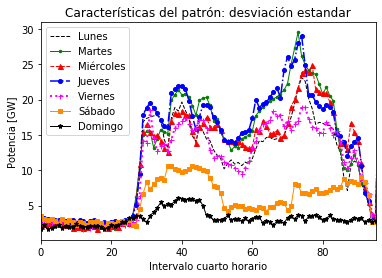

In [15]:
plt.figure("STD PATTERN FEATURES")
plt.title('Características del patrón: desviación estandar')
#plt.title('Pattern features: standard deviation')
#plt.xlabel("15 minutes interval")
plt.xlabel("Intervalo cuarto horario")
plt.xscale('linear')
plt.ylabel("Potencia [GW]")
plt.yscale('linear') 
plt.xlim(0,95.05)

plt.plot(DSLUNES, color='black', linestyle='dashed', linewidth=1, marker='', markerfacecolor='black', markersize=2.5)
plt.plot(DSMARTES, color='green', linestyle='solid', linewidth=1, marker='.', markerfacecolor='green', markersize=5)
plt.plot(DSMIERCOLES, color='red', linestyle='dashed', linewidth=1, marker='^', markerfacecolor='red', markersize=5)
plt.plot(DSJUEVES, color='blue', linestyle='-.', linewidth=1.5, marker='o', markerfacecolor='blue', markersize=4)
plt.plot(DSVIERNES, color='magenta', linestyle=':', linewidth=2, marker='+', markerfacecolor='magenta', markersize=5)
plt.plot(DSSABADO, color='darkorange', linestyle='solid', linewidth=1, marker='s', markerfacecolor='darkorange', markersize=4)
plt.plot(DSDOMINGO, color='black', linestyle='solid', linewidth=1, marker='*', markerfacecolor='black', markersize=5)

#plt.legend(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#plt.legend(["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sábado", "Domingo"], fontsize=12)
plt.legend(["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"], loc=2, fontsize = 'medium')

In [16]:
df_mean=pd.DataFrame(index=np.arange(7+7).T,columns=np.arange(99).T)#2208
df_mean.iloc[0]=MLUNES.T
df_mean.iloc[1]=MMARTES.T
df_mean.iloc[2]=MMIERCOLES.T
df_mean.iloc[3]=MJUEVES.T
df_mean.iloc[4]=MVIERNES.T
df_mean.iloc[5]=MSABADO.T
df_mean.iloc[6]=MDOMINGO.T
##std
df_mean.iloc[7]=DSLUNES.T
df_mean.iloc[8]=DSMARTES.T
df_mean.iloc[9]=DSMIERCOLES.T
df_mean.iloc[10]=DSJUEVES.T
df_mean.iloc[11]=DSVIERNES.T
df_mean.iloc[12]=DSSABADO.T
df_mean.iloc[13]=DSDOMINGO.T

In [17]:
df_mean.to_csv('AC_PRIN_PATRONES.csv')

In [18]:
DEL2=[[0] * 1 for i in range(6)]
DEM2=[[0] * 1 for i in range(6)]
DEMI2=[[0] * 1 for i in range(6)]
DEJ2=[[0] * 1 for i in range(6)]
DEV2=[[0] * 1 for i in range(6)]
DES2=[[0] * 1 for i in range(6)]
DED2=[[0] * 1 for i in range(6)]

In [19]:
print("Clusterin according the mean")
MAXPAT=np.max(np.concatenate((MLUNES,MMARTES,MMIERCOLES,MJUEVES,MVIERNES,MSABADO,MDOMINGO),axis=0))
MLUNES=MLUNES/MAXPAT
MMARTES=MMARTES/MAXPAT
MMIERCOLES=MMIERCOLES/MAXPAT
MJUEVES=MJUEVES/MAXPAT
MVIERNES=MVIERNES/MAXPAT
MSABADO=MSABADO/MAXPAT
MDOMINGO=MDOMINGO/MAXPAT

DELM =distance.euclidean(MLUNES,MMARTES)
DELMI =distance.euclidean(MLUNES,MMIERCOLES)
DELJ =distance.euclidean(MLUNES,MJUEVES)
DELV =distance.euclidean(MLUNES,MVIERNES)
DELS =distance.euclidean(MLUNES,MSABADO)
DELD =distance.euclidean(MLUNES,MDOMINGO)
DEL2[0]=DELM
DEL2[1]=DELMI
DEL2[2]=DELJ
DEL2[3]=DELV
DEL2[4]=DELS
DEL2[5]=DELD
###MARTESSSSSSSSSSSSSSS
DEMM =distance.euclidean(MMARTES,MMIERCOLES)
DEMJ =distance.euclidean(MMARTES,MJUEVES)
DEMV =distance.euclidean(MMARTES,MVIERNES)
DEMS =distance.euclidean(MMARTES,MSABADO)
DEMD =distance.euclidean(MMARTES,MDOMINGO)
DEM2[0]=DELM
DEM2[1]=DEMM
DEM2[2]=DEMJ
DEM2[3]=DEMV
DEM2[4]=DEMS
DEM2[5]=DEMD
########MIRCOLESSSSSSSSSSSSSSSSSS
DEMIJ =distance.euclidean(MMIERCOLES,MJUEVES)
DEMIV =distance.euclidean(MMIERCOLES,MVIERNES)
DEMIS =distance.euclidean(MMIERCOLES,MSABADO)
DEMID =distance.euclidean(MMIERCOLES,MDOMINGO)
DEMI2[0]=DELMI
DEMI2[1]=DEMM
DEMI2[2]=DEMIJ
DEMI2[3]=DEMIV
DEMI2[4]=DEMIS
DEMI2[5]=DEMID
############JUEVES
DEJV =distance.euclidean(MJUEVES,MVIERNES)
DEJS =distance.euclidean(MJUEVES,MSABADO)
DEJD =distance.euclidean(MJUEVES,MDOMINGO)
DEJ2[0]=DELJ
DEJ2[1]=DEMJ
DEJ2[2]=DEMIJ
DEJ2[3]=DEJV
DEJ2[4]=DEJS
DEJ2[5]=DEJD
####VIEENESSSSSSSSSSSS
DEVS =distance.euclidean(MVIERNES,MSABADO)
DEVD =distance.euclidean(MVIERNES,MDOMINGO)
DEV2[0]=DELV
DEV2[1]=DEMV
DEV2[2]=DEMIV
DEV2[3]=DEJV
DEV2[4]=DEVS
DEV2[5]=DEVD
#######SABADOOOOOOOOOOOO
DESD =distance.euclidean(MSABADO, MDOMINGO)
DES2[0]=DELS
DES2[1]=DEMS
DES2[2]=DEMIS
DES2[3]=DEJS
DES2[4]=DEVS
DES2[5]=DESD

##############DOMINGO
DED2[0]=DELD
DED2[1]=DEMD
DED2[2]=DEMID
DED2[3]=DEJD
DED2[4]=DEVD
DED2[5]=DESD
print (DELM, DELMI, DELJ, DELV, DELS, DELD, DEMM, DEMJ, DEMV, DEMS, DEMD, DEMIJ, DEMIV, DEMIS, DEMID, DEJV, DEJS, DEJD, DEVS, DEVD, DESD)

Clusterin according the mean
0.17823155751335854 0.11080633448640927 0.09681970009065863 0.19699531202690762 3.314439041768294 3.8711126751613465 0.10093283166662073 0.1364644949274775 0.30461234985024105 3.43504872888387 3.9907345462974324 0.07931211246488348 0.24119761020582783 3.3851806848527084 3.9395878654588303 0.20941376714166507 3.3799954942439343 3.9371955189509826 3.2799020225056963 3.8510284904467182 0.6988001696253878


In [20]:
print("Clusterin according the STD")
EDLM =distance.euclidean(DSLUNES,DSMARTES)
EDLMI =distance.euclidean(DSLUNES,DSMIERCOLES)
EDLJ =distance.euclidean(DSLUNES,DSJUEVES)
EDLV =distance.euclidean(DSLUNES,DSVIERNES)
EDLS =distance.euclidean(DSLUNES,DSSABADO)
EDLD =distance.euclidean(DSLUNES,DSDOMINGO)

EDMM =distance.euclidean(DSMARTES,DSMIERCOLES)
EDMJ =distance.euclidean(DSMARTES,DSJUEVES)
EDMV =distance.euclidean(DSMARTES,DSVIERNES)
EDMS =distance.euclidean(DSMARTES,DSSABADO)
EDMD =distance.euclidean(DSMARTES,DSDOMINGO)

EDMIJ =distance.euclidean(DSMIERCOLES,DSJUEVES)
EDMIV =distance.euclidean(DSMIERCOLES,DSVIERNES)
EDMIS =distance.euclidean(DSMIERCOLES,DSSABADO)
EDMID =distance.euclidean(DSMIERCOLES,DSDOMINGO)

EDJV =distance.euclidean(DSJUEVES,DSVIERNES)
EDJS =distance.euclidean(DSJUEVES,DSSABADO)
EDJD =distance.euclidean(DSJUEVES,DSDOMINGO)

EDVS =distance.euclidean(DSVIERNES,DSSABADO)
EDVD =distance.euclidean(DSVIERNES,DSDOMINGO)

EDSD =distance.euclidean(DSSABADO, DSDOMINGO)

print (EDLM,EDLMI,EDLJ,EDLV,EDLS,EDLD,EDMM,EDMJ,EDMV,EDMS,EDMD,EDMIJ,EDMIV,EDMIS,EDMID,EDJV,EDJS,EDJD,EDVS,EDVD,EDSD)

Clusterin according the STD
33.225752798117234 22.280848320453607 33.98446712084224 18.29319187704096 68.12887249065913 94.52804363271547 25.035040937631102 16.891293038816904 37.33326451284974 95.88371754440892 121.81288416823668 27.975027122887308 26.705145128765764 80.50152236398188 107.4209465830528 38.08337292493353 97.80606361793544 124.32772370678308 63.71143085485063 90.26294629546473 32.14228995436811


In [21]:
## UNIFICACION DE PATRONES ##
PATRONDL=LDETANSO
cont=0
for i in range(6):
    if DEL2[i] < UmbClus:
        if i==0:
            PATRONDL=np.concatenate((PATRONDL,MDETANSO),axis=0)
            cont=1
        if i==1:
            PATRONDL=np.concatenate((PATRONDL,MIDETANSO),axis=0)
            cont=1
        if i==2:
            PATRONDL=np.concatenate((PATRONDL,JDETANSO),axis=0)
            cont=1
        if i==3:
            PATRONDL=np.concatenate((PATRONDL,VDETANSO),axis=0)
            cont=1
        if i==4:
            PATRONDL=np.concatenate((PATRONDL,SDETANSO),axis=0)
            cont=1
        if i==5:
            PATRONDL=np.concatenate((PATRONDL,DDETANSO),axis=0)
            cont=1
if cont==0:
    print("el dia lunes no se agrupa")
PATRONDM=MDETANSO
cont=0
for i in range(6):
    if DEM2[i] < UmbClus:
        if i==0:
            PATRONDM=np.concatenate((PATRONDM,LDETANSO),axis=0)
            cont=1
        if i==1:
            PATRONDM=np.concatenate((PATRONDM,MIDETANSO),axis=0)
            cont=1
        if i==2:
            PATRONDM=np.concatenate((PATRONDM,JDETANSO),axis=0)
            cont=1
        if i==3:
            PATRONDM=np.concatenate((PATRONDM,VDETANSO),axis=0)
            cont=1
        if i==4:
            PATRONDM=np.concatenate((PATRONDM,SDETANSO),axis=0)
            cont=1
        if i==5:
            PATRONDM=np.concatenate((PATRONDM,DDETANSO),axis=0)
            cont=1
if cont==0:
    print("el dia martes no se agrupa")
PATRONDMI=MIDETANSO
acumu3=0
cont=0
for i in range(6):
    if DEMI2[i] < UmbClus:
        if i==0:
            PATRONDMI=np.concatenate((PATRONDMI,LDETANSO),axis=0)
            cont=1
        if i==1:
            PATRONDMI=np.concatenate((PATRONDMI,MDETANSO),axis=0)
            cont=1    
        if i==2:
            PATRONDMI=np.concatenate((PATRONDMI,JDETANSO),axis=0)
            cont=1
        if i==3:
            PATRONDMI=np.concatenate((PATRONDMI,VDETANSO),axis=0)
            acumu3=1
            cont=1
        if i==4:
            PATRONDMI=np.concatenate((PATRONDMI,SDETANSO),axis=0)
            acumu3=2
            cont=1
        if i==5:
            PATRONDMI=np.concatenate((PATRONDMI,DDETANSO),axis=0)
            acumu3=3
            cont=1
if cont==0:
    print("el dia miercoles no se agrupa")
PATRONDJ=JDETANSO
acumu4=0
cont=0
for i in range(6):
    if DEJ2[i] < UmbClus:
        if i==0:
            PATRONDJ=np.concatenate((PATRONDJ,LDETANSO),axis=0)
            cont=1
        if i==1:
            PATRONDJ=np.concatenate((PATRONDJ,MDETANSO),axis=0)
            cont=1
        if i==2:
            PATRONDJ=np.concatenate((PATRONDJ,MIDETANSO),axis=0)
            cont=1
        if i==3:
            PATRONDJ=np.concatenate((PATRONDJ,VDETANSO),axis=0)
            cont=1
        if i==4:
            PATRONDJ=np.concatenate((PATRONDJ,SDETANSO),axis=0)
            acumu4=1
            cont=1
        if i==5:
            PATRONDJ=np.concatenate((PATRONDJ,DDETANSO),axis=0)
            acumu4=2
            cont=1
if cont==0:
    print("el dia jueves no se agrupa")
PATRONDV=VDETANSO
cont=0
for i in range(6):
    if DEV2[i] < UmbClus:
        if i==0:
            PATRONDV=np.concatenate((PATRONDV,LDETANSO),axis=0)
            cont=1
        if i==1:
            PATRONDV=np.concatenate((PATRONDV,MDETANSO),axis=0)
            cont=1
        if i==2:
            PATRONDV=np.concatenate((PATRONDV,MIDETANSO),axis=0)
            cont=1
        if i==3:
            PATRONDV=np.concatenate((PATRONDV,JDETANSO),axis=0)
            cont=1
        if i==4:
            PATRONDV=np.concatenate((PATRONDV,SDETANSO),axis=0)
            cont=1
        if i==5:
            PATRONDV=np.concatenate((PATRONDV,DDETANSO),axis=0)
            cont=1
if cont==0:
    print("el dia viernes no se agrupa")
PATRONDS=SDETANSO
cont=0
for i in range(6):
    if (DES2[i] < UmbClus):
        if i==0:
            PATRONDS=np.concatenate((PATRONDS,LDETANSO),axis=0)
            cont=1
        if i==1:
            PATRONDS=np.concatenate((PATRONDS,MDETANSO),axis=0)
            cont=1
        if i==2:
            PATRONDS=np.concatenate((PATRONDS,MIDETANSO),axis=0)
            cont=1
        if i==3:
            PATRONDS=np.concatenate((PATRONDS,JDETANSO),axis=0)
            cont=1
        if i==4:
            PATRONDS=np.concatenate((PATRONDS,VDETANSO),axis=0)
            cont=1
        if i==5:
            PATRONDS=np.concatenate((PATRONDS,DDETANSO),axis=0)
            cont=1
if cont==0:
    print("el dia sabado no se agrupa")
      
PATRONDD=DDETANSO           
for i in range(6):
    if (DED2[i] < UmbClus):
        if i==0:
            PATRONDD=np.concatenate((PATRONDD,LDETANSO),axis=0)
            cont=1
        if i==1:
            PATRONDD=np.concatenate((PATRONDD,MDETANSO),axis=0)
            cont=1
        if i==2:
            PATRONDD=np.concatenate((PATRONDD,MIDETANSO),axis=0)
            cont=1
        if i==3:
            PATRONDD=np.concatenate((PATRONDD,JDETANSO),axis=0)
            cont=1
        if i==4:
            PATRONDD=np.concatenate((PATRONDD,VDETANSO),axis=0)
            cont=1
        if i==5:
            PATRONDD=np.concatenate((PATRONDD,SDETANSO),axis=0)
            cont=1
if cont==0:
    print("el dia domingo no se agrupa")
if DiaAnal==1:
    PATROND=PATRONDL
if DiaAnal==2:
    PATROND=PATRONDM
if DiaAnal==3:
    PATROND=PATRONDMI
if DiaAnal==4:
    PATROND=PATRONDJ
if DiaAnal==5:
    PATROND=PATRONDV
if DiaAnal==6:
    PATROND=PATRONDS
if DiaAnal==7:
    PATROND=PATRONDD

el dia sabado no se agrupa
el dia domingo no se agrupa


In [22]:
#CREACIÓN DE MATRICES
MPATROND=np.zeros(shape=(PATROND.shape[1],1))     #MATRIZ QUE ALMACENARÁ LOS VALORES DE LA MEDIA ARITMÉTICA
DSPATROND=np.zeros(shape=(PATROND.shape[1],1))    #MATRIZ QUE ALMACENARÁ LOS VALORES DE LA DESVIACIÓN ESTÁNDAR
ZMINPATROND=np.zeros(shape=(PATROND.shape[1],1))  #MATRIZ QUE ALMACENARÁ LOS ZMIN
ZMAXPATROND=np.zeros(shape=(PATROND.shape[1],1))  #MATRIZ QUE ALMACENARÁ LOS ZMAX
MINPATROND=np.zeros(shape=(PATROND.shape[1],1))   #MATRIZ QUE ALMACENARÁ LOS ZMIN
MAXPATROND=np.zeros(shape=(PATROND.shape[1],1))   #MATRIZ QUE ALMACENARÁ LOS ZMAX
ZDA=np.zeros(shape=(PATROND.shape[1],1))          #MATRIZ QUE ALMACENARÁ LOS Z DE DÍAS ATÍPICOS
ZDTIP=np.zeros(shape=(PATROND.shape[1],1))        #MATRIZ QUE ALMACENARÁ LOS Z DE DÍAS TÍPICOS
PATRONDN=norm.fit_transform(PATROND)              #MATRIZ QUE ALMACENA LA NORMALIZACIÓN DE LA MATRIZ DEL PATRÓN DE DÍA

for i in range (PATROND.shape[1]):
    MPATROND[i][0]=np.mean(PATROND.T[i][:])
    DSPATROND[i][0]=np.std(PATROND.T[i][:])
    ZMINPATROND[i][0]=np.min(PATRONDN.T[i][:])
    ZMAXPATROND[i][0]=np.max((PATRONDN.T[i][:]))

In [23]:
Nuevo=MPATROND-LDETANCO[0].reshape(99,1)
Nuevo2=MPATROND-LDETANSO[0].reshape(99,1)

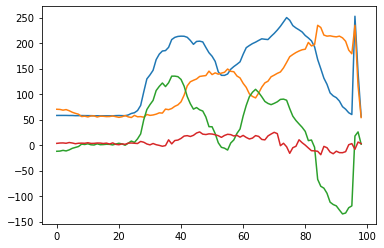

In [24]:
plt.plot(MPATROND)
plt.plot(LDETANCO[0].reshape(99,1))
#plt.plot(MPATROND+2*DSPATROND)
#plt.plot(MPATROND-2*DSPATROND)
plt.plot(Nuevo)
plt.plot(Nuevo2)

(129, 99) (17, 99) (35, 99)
(99,)
(99,)


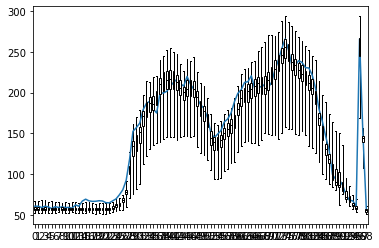

In [25]:
print(PATROND.shape,JDETANCO.shape,JDETANSO.shape)
print(np.amax(PATROND.T,axis=1).shape)
print(np.amin(PATROND.T,axis=1).shape)

plt.boxplot(PATROND, whis=1000, positions=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98], notch=False, patch_artist=True,
            boxprops=dict(facecolor='white', color='black'), capprops=dict(color='black'), whiskerprops=dict(color='black',linestyle='solid'), flierprops=dict(color='white', markeredgecolor='white'), medianprops=dict(color='black'))
plt.plot(MIDETANCO[14].reshape(99,1))
#plt.plot(MIDETANCO[20].reshape(99,1))
#plt.plot(VDETANCO[22].reshape(99,1))
#plt.plot(LDETANSO[3].reshape(99,1))

#for i in range(22,25):
    #plt.plot(VDETANCO[i].reshape(99,1))

In [26]:
#UPS MIDETANCO[7,8,16]  VDETANCO[3]*1.2   MIDETANSO[1]
df_patron = pd.DataFrame(data=PATROND)
df_patron = df_patron.append(pd.DataFrame(data=MIDETANCO[8].reshape(1,99)),ignore_index=True)
df_patron = df_patron.append(pd.DataFrame(data=MIDETANCO[16].reshape(1,99)),ignore_index=True)
df_patron = df_patron.append(pd.DataFrame(data=(VDETANCO[3]*1.2).reshape(1,99)),ignore_index=True)
df_patron = df_patron.append(pd.DataFrame(data=MIDETANSO[1].reshape(1,99)),ignore_index=True)

In [27]:
df_patron.to_csv('PATRON_4_DIAS_ANOMALOS.csv')

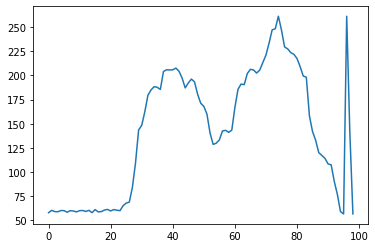

In [28]:
plt.plot(LDETANSO[3])

In [29]:
import Concluir
Dia_Ana=LDETANSO[3]
Dia_AnaSO=DDETANSO
Dia_AnaCO_shape=Dia_Ana.shape[0]
Dia_AnaSO_shape=Dia_AnaSO.shape[0]
dfpr=pd.DataFrame(index=np.arange(Dia_AnaCO_shape+Dia_AnaSO_shape).T,columns=np.arange(132).T)#2208
aux_sl=0

In [30]:
DA1=Dia_Ana.reshape(1,99)
ZDA1=np.zeros(shape=(PATROND.shape[1],1))  
CATI=np.zeros(shape=(PATROND.shape[1],1))
AZMIN=np.zeros(shape=(PATROND.shape[1],1))
AZMAX=np.zeros(shape=(PATROND.shape[1],1))
ICONF=np.zeros(shape=(PATROND.shape[1],1))
E1=np.zeros(shape=(PATROND.shape[1],1))
E2=np.zeros(shape=(PATROND.shape[1],1))
for i in range (PATROND.shape[1]):
     ZDA1[i][0]=(DA1[0][i]-MPATROND[i][0])/DSPATROND[i][0]
reg1=0
for i in range (PATROND.shape[1]):
    #ws.cell(row=i+3, column=1).value=i+1
    if (ZMINPATROND[i][0]<ZDA1[i][0]<ZMAXPATROND[i][0]):
        CATI[i][0]=0
        #ws.cell(row=i+3, column=8).value=CATI[i][0]
    else:
        CATI[i][0]=1
        reg1=reg1+1
        #ws.cell(row=i+3, column=8).value=CATI[i][0]
    AZMIN[i][0]=st.norm.cdf(ZMINPATROND[i][0])
    #ws.cell(row=i+3, column=2).value=ZMINPATROND[i][0]
    #ws.cell(row=i+3, column=5).value=AZMIN[i][0]
    
    AZMAX[i][0]=st.norm.cdf(ZMAXPATROND[i][0])
    #ws.cell(row=i+3, column=3).value=ZMAXPATROND[i][0]
    #ws.cell(row=i+3, column=6).value=AZMAX[i][0]
    ICONF[i][0]=AZMAX[i][0]-AZMIN[i][0]
    #ws.cell(row=i+3, column=7).value=ICONF[i][0]
    E1[i][0]=1-ICONF[i][0]
    #ws.cell(row=i+3, column=9).value=E1[i][0]
   # ws.cell(row=i+3, column=4).value=ZDA1[i][0]
    if (ZDA1[i][0]>1.96):
        if (ZMAXPATROND[i][0]>ZDA1[i][0]):
            E2[i][0]=1-st.norm.cdf(1.96)
            #ws.cell(row=i+3, column=10).value=E2[i][0]
        else:
            E2[i][0]=0
            #ws.cell(row=i+3, column=10).value=E2[i][0]
    elif (ZDA1[i][0]<-1.96):
        if (ZMINPATROND[i][0]<ZDA1[i][0]):
            E2[i][0]=st.norm.cdf(-1.96)-0 #AZMIN[i][0]
            #ws.cell(row=i+3, column=10).value=E2[i][0]
        else:
            E2[i][0]=0
            #ws.cell(row=i+3, column=10).value=E2[i][0]
    else:
        E2[i][0]=0
        #ws.cell(row=i+3, column=10).value=E2[i][0]
ICONFBP=ICONF.T[0][0:96]
#ws.cell(row=106, column=12).value=np.median(ICONFBP)

suma=0
#wb.save("Respat.xlsx")
reg3=0
for i in range (27):
    if CATI[i][0]==1:
        reg3=reg3+1
reg4=0
for i in range (84,95):
    if CATI[i][0]==1:
        reg4=reg4+1
reg2=reg3+reg4
reg5=0
for i in range (28,83):
    if CATI[i][0]==1:
        reg5=reg5+1
reg6=0
for i in range (28,55):
    if CATI[i][0]==1:
        reg6=reg6+1
reg7=0
for i in range (64,83):
    if CATI[i][0]==1:
        reg7=reg7+1
numreg8=np.zeros(shape=(1,96))
aux=0
for i in range(1,96):
    if DA1[0][i]==DA1[0][i-1]:
        numreg8[0][aux]=numreg8[0][aux] +1
    else:
        numreg8[0][aux]=0
        aux=aux+1
a=max(numreg8.T)
reg8=a[0]
numreg9=np.zeros(shape=(1,96))
aux=0
for i in range(1,96):
    if (CATI[i][0]==CATI[i-1][0]) & (CATI[i][0]==1):
        numreg9[0][aux]=numreg9[0][aux] +1
    else:
        numreg9[0][aux]=0
        aux=aux+1
a=max(numreg9.T)
reg9=a[0]
if ZDA1[97][0] > ZMAXPATROND[97][0]:
    reg10=1
elif ZDA1[97][0] < ZMINPATROND[97][0]:
    reg10=-1
else:
    reg10=0
if ZDA1[96][0] > ZMAXPATROND[96][0]:
    reg11=1
elif ZDA1[96][0] < ZMINPATROND[96][0]:
    reg11=-1
else:
    reg11=0
if ZDA1[98][0] > ZMAXPATROND[98][0]:
    reg12=1
elif ZDA1[98][0] < ZMINPATROND[98][0]:
    reg12=-1
else:
    reg12=0
reg1=(reg1/96)*100
reg2=(reg2/40)*100
reg3=(reg3/28)*100
reg4=(reg4/12)*100
reg5=(reg5/56)*100
reg6=(reg6/28)*100
reg7=(reg7/24)*100
reg8=(reg8/4)
reg9=(reg9/4)
P1=1/3
P2=1/3
P3=1/6
P4=1/6
t1c=reg1/100
Ic1=np.median(ICONF[0:95])
Ic2=ICONF[96][0]
Ic3=ICONF[97][0]
Ic4=ICONF[98][0]
I2=np.absolute(reg10)
I3=np.absolute(reg11)
I4=np.absolute(reg12)
Icmax=(P1*Ic1)+(P2*Ic2)+(P3*Ic3)+(P4*Ic4)
Ichange=(P1*t1c*Ic1)+(P2*I2*Ic2)+(P3*I3*Ic3)+(P4*I4*Ic4)
IoC=Ichange/Icmax

Concluir.concluciones(reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg9,reg10,reg11,reg12)

Dia totalmente normal-se ajusta al patron de consumo


[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [31]:
##DA1 dia de analisis
for i_sl in range(Dia_Ana.shape[0]):
    DA1=Dia_Ana[i_sl].reshape(1,99)
    ZDA1=np.zeros(shape=(PATROND.shape[1],1))    
    for i in range (PATROND.shape[1]):
         ZDA1[i][0]=(DA1[0][i]-MPATROND[i][0])/DSPATROND[i][0]
    MINPATROND=ZMINPATROND*DSPATROND+MPATROND
    MAXPATROND=ZMAXPATROND*DSPATROND+MPATROND
    CATI=np.zeros(shape=(PATROND.shape[1],1))
    AZMIN=np.zeros(shape=(PATROND.shape[1],1))
    AZMAX=np.zeros(shape=(PATROND.shape[1],1))
    ICONF=np.zeros(shape=(PATROND.shape[1],1))
    E1=np.zeros(shape=(PATROND.shape[1],1))
    E2=np.zeros(shape=(PATROND.shape[1],1))
    reg1=0
    for i in range (PATROND.shape[1]):
        #ws.cell(row=i+3, column=1).value=i+1
        if (ZMINPATROND[i][0]<ZDA1[i][0]<ZMAXPATROND[i][0]):
            CATI[i][0]=0
            #ws.cell(row=i+3, column=8).value=CATI[i][0]
        else:
            CATI[i][0]=1
            reg1=reg1+1
            #ws.cell(row=i+3, column=8).value=CATI[i][0]
        AZMIN[i][0]=st.norm.cdf(ZMINPATROND[i][0])
        #ws.cell(row=i+3, column=2).value=ZMINPATROND[i][0]
        #ws.cell(row=i+3, column=5).value=AZMIN[i][0]

        AZMAX[i][0]=st.norm.cdf(ZMAXPATROND[i][0])
        #ws.cell(row=i+3, column=3).value=ZMAXPATROND[i][0]
        #ws.cell(row=i+3, column=6).value=AZMAX[i][0]
        ICONF[i][0]=AZMAX[i][0]-AZMIN[i][0]
        #ws.cell(row=i+3, column=7).value=ICONF[i][0]
        E1[i][0]=1-ICONF[i][0]
        #ws.cell(row=i+3, column=9).value=E1[i][0]
       # ws.cell(row=i+3, column=4).value=ZDA1[i][0]
        if (ZDA1[i][0]>1.96):
            if (ZMAXPATROND[i][0]>ZDA1[i][0]):
                E2[i][0]=1-st.norm.cdf(1.96)
                #ws.cell(row=i+3, column=10).value=E2[i][0]
            else:
                E2[i][0]=0
                #ws.cell(row=i+3, column=10).value=E2[i][0]
        elif (ZDA1[i][0]<-1.96):
            if (ZMINPATROND[i][0]<ZDA1[i][0]):
                E2[i][0]=st.norm.cdf(-1.96)-0 #AZMIN[i][0]
                #ws.cell(row=i+3, column=10).value=E2[i][0]
            else:
                E2[i][0]=0
                #ws.cell(row=i+3, column=10).value=E2[i][0]
        else:
            E2[i][0]=0
            #ws.cell(row=i+3, column=10).value=E2[i][0]
    ICONFBP=ICONF.T[0][0:96]
    #ws.cell(row=106, column=12).value=np.median(ICONFBP)

    suma=0
    #wb.save("Respat.xlsx")
    reg3=0
    for i in range (27):
        if CATI[i][0]==1:
            reg3=reg3+1
    reg4=0
    for i in range (84,95):
        if CATI[i][0]==1:
            reg4=reg4+1
    reg2=reg3+reg4
    reg5=0
    for i in range (28,83):
        if CATI[i][0]==1:
            reg5=reg5+1
    reg6=0
    for i in range (28,55):
        if CATI[i][0]==1:
            reg6=reg6+1
    reg7=0
    for i in range (64,83):
        if CATI[i][0]==1:
            reg7=reg7+1
    numreg8=np.zeros(shape=(1,96))
    aux=0
    for i in range(1,96):
        if DA1[0][i]==DA1[0][i-1]:
            numreg8[0][aux]=numreg8[0][aux] +1
        else:
            numreg8[0][aux]=0
            aux=aux+1
    a=max(numreg8.T)
    reg8=a[0]
    numreg9=np.zeros(shape=(1,96))
    aux=0
    for i in range(1,96):
        if (CATI[i][0]==CATI[i-1][0]) & (CATI[i][0]==1):
            numreg9[0][aux]=numreg9[0][aux] +1
        else:
            numreg9[0][aux]=0
            aux=aux+1
    a=max(numreg9.T)
    reg9=a[0]
    if ZDA1[97][0] > ZMAXPATROND[97][0]:
        reg10=1
    elif ZDA1[97][0] < ZMINPATROND[97][0]:
        reg10=-1
    else:
        reg10=0
    if ZDA1[96][0] > ZMAXPATROND[96][0]:
        reg11=1
    elif ZDA1[96][0] < ZMINPATROND[96][0]:
        reg11=-1
    else:
        reg11=0
    if ZDA1[98][0] > ZMAXPATROND[98][0]:
        reg12=1
    elif ZDA1[98][0] < ZMINPATROND[98][0]:
        reg12=-1
    else:
        reg12=0
    reg1=(reg1/96)*100
    reg2=(reg2/40)*100
    reg3=(reg3/28)*100
    reg4=(reg4/12)*100
    reg5=(reg5/56)*100
    reg6=(reg6/28)*100
    reg7=(reg7/24)*100
    reg8=(reg8/4)
    reg9=(reg9/4)
    P1=1/3
    P2=1/3
    P3=1/6
    P4=1/6
    t1c=reg1/100
    Ic1=np.median(ICONF[0:95])
    Ic2=ICONF[96][0]
    Ic3=ICONF[97][0]
    Ic4=ICONF[98][0]
    I2=np.absolute(reg10)
    I3=np.absolute(reg11)
    I4=np.absolute(reg12)
    Icmax=(P1*Ic1)+(P2*Ic2)+(P3*Ic3)+(P4*Ic4)
    Ichange=(P1*t1c*Ic1)+(P2*I2*Ic2)+(P3*I3*Ic3)+(P4*I4*Ic4)
    IoC=Ichange/Icmax
    print(IoC)
    resultado=Concluir.concluciones(reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg9,reg10,reg11,reg12)
    Dia_resta=MPATROND-DA1.T
    dfpr.iloc[aux_sl]=np.concatenate((ZDA1.T,np.asarray(resultado).reshape(33,1).T),axis=1)
    aux_sl=aux_sl+1

ValueError: cannot reshape array of size 1 into shape (1,99)

In [ ]:
##DA1 dia de analisis
for i_sl in range(Dia_AnaSO.shape[0]):
    DA1=Dia_AnaSO[i_sl].reshape(1,99)
    ZDA1=np.zeros(shape=(PATROND.shape[1],1))    
    for i in range (PATROND.shape[1]):
         ZDA1[i][0]=(DA1[0][i]-MPATROND[i][0])/DSPATROND[i][0]
    MINPATROND=ZMINPATROND*DSPATROND+MPATROND
    MAXPATROND=ZMAXPATROND*DSPATROND+MPATROND
    CATI=np.zeros(shape=(PATROND.shape[1],1))
    AZMIN=np.zeros(shape=(PATROND.shape[1],1))
    AZMAX=np.zeros(shape=(PATROND.shape[1],1))
    ICONF=np.zeros(shape=(PATROND.shape[1],1))
    E1=np.zeros(shape=(PATROND.shape[1],1))
    E2=np.zeros(shape=(PATROND.shape[1],1))
    reg1=0
    for i in range (PATROND.shape[1]):
        #ws.cell(row=i+3, column=1).value=i+1
        if (ZMINPATROND[i][0]<ZDA1[i][0]<ZMAXPATROND[i][0]):
            CATI[i][0]=0
            #ws.cell(row=i+3, column=8).value=CATI[i][0]
        else:
            CATI[i][0]=1
            reg1=reg1+1
            #ws.cell(row=i+3, column=8).value=CATI[i][0]
        AZMIN[i][0]=st.norm.cdf(ZMINPATROND[i][0])
        #ws.cell(row=i+3, column=2).value=ZMINPATROND[i][0]
        #ws.cell(row=i+3, column=5).value=AZMIN[i][0]

        AZMAX[i][0]=st.norm.cdf(ZMAXPATROND[i][0])
        #ws.cell(row=i+3, column=3).value=ZMAXPATROND[i][0]
        #ws.cell(row=i+3, column=6).value=AZMAX[i][0]
        ICONF[i][0]=AZMAX[i][0]-AZMIN[i][0]
        #ws.cell(row=i+3, column=7).value=ICONF[i][0]
        E1[i][0]=1-ICONF[i][0]
        #ws.cell(row=i+3, column=9).value=E1[i][0]
       # ws.cell(row=i+3, column=4).value=ZDA1[i][0]
        if (ZDA1[i][0]>1.96):
            if (ZMAXPATROND[i][0]>ZDA1[i][0]):
                E2[i][0]=1-st.norm.cdf(1.96)
                #ws.cell(row=i+3, column=10).value=E2[i][0]
            else:
                E2[i][0]=0
                #ws.cell(row=i+3, column=10).value=E2[i][0]
        elif (ZDA1[i][0]<-1.96):
            if (ZMINPATROND[i][0]<ZDA1[i][0]):
                E2[i][0]=st.norm.cdf(-1.96)-0 #AZMIN[i][0]
                #ws.cell(row=i+3, column=10).value=E2[i][0]
            else:
                E2[i][0]=0
                #ws.cell(row=i+3, column=10).value=E2[i][0]
        else:
            E2[i][0]=0
            #ws.cell(row=i+3, column=10).value=E2[i][0]
    ICONFBP=ICONF.T[0][0:96]
    #ws.cell(row=106, column=12).value=np.median(ICONFBP)

    suma=0
    #wb.save("Respat.xlsx")
    reg3=0
    for i in range (27):
        if CATI[i][0]==1:
            reg3=reg3+1
    reg4=0
    for i in range (84,95):
        if CATI[i][0]==1:
            reg4=reg4+1
    reg2=reg3+reg4
    reg5=0
    for i in range (28,83):
        if CATI[i][0]==1:
            reg5=reg5+1
    reg6=0
    for i in range (28,55):
        if CATI[i][0]==1:
            reg6=reg6+1
    reg7=0
    for i in range (64,83):
        if CATI[i][0]==1:
            reg7=reg7+1
    numreg8=np.zeros(shape=(1,96))
    aux=0
    for i in range(1,96):
        if DA1[0][i]==DA1[0][i-1]:
            numreg8[0][aux]=numreg8[0][aux] +1
        else:
            numreg8[0][aux]=0
            aux=aux+1
    a=max(numreg8.T)
    reg8=a[0]
    numreg9=np.zeros(shape=(1,96))
    aux=0
    for i in range(1,96):
        if (CATI[i][0]==CATI[i-1][0]) & (CATI[i][0]==1):
            numreg9[0][aux]=numreg9[0][aux] +1
        else:
            numreg9[0][aux]=0
            aux=aux+1
    a=max(numreg9.T)
    reg9=a[0]
    if ZDA1[97][0] > ZMAXPATROND[97][0]:
        reg10=1
    elif ZDA1[97][0] < ZMINPATROND[97][0]:
        reg10=-1
    else:
        reg10=0
    if ZDA1[96][0] > ZMAXPATROND[96][0]:
        reg11=1
    elif ZDA1[96][0] < ZMINPATROND[96][0]:
        reg11=-1
    else:
        reg11=0
    if ZDA1[98][0] > ZMAXPATROND[98][0]:
        reg12=1
    elif ZDA1[98][0] < ZMINPATROND[98][0]:
        reg12=-1
    else:
        reg12=0
    reg1=(reg1/96)*100
    reg2=(reg2/40)*100
    reg3=(reg3/28)*100
    reg4=(reg4/12)*100
    reg5=(reg5/56)*100
    reg6=(reg6/28)*100
    reg7=(reg7/24)*100
    reg8=(reg8/4)
    reg9=(reg9/4)
    P1=1/3
    P2=1/3
    P3=1/6
    P4=1/6
    t1c=reg1/100
    Ic1=np.median(ICONF[0:95])
    Ic2=ICONF[96][0]
    Ic3=ICONF[97][0]
    Ic4=ICONF[98][0]
    I2=np.absolute(reg10)
    I3=np.absolute(reg11)
    I4=np.absolute(reg12)
    Icmax=(P1*Ic1)+(P2*Ic2)+(P3*Ic3)+(P4*Ic4)
    Ichange=(P1*t1c*Ic1)+(P2*I2*Ic2)+(P3*I3*Ic3)+(P4*I4*Ic4)
    IoC=Ichange/Icmax
    print(IoC)
    resultado=Concluir.concluciones(reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg9,reg10,reg11,reg12)

    dfpr.iloc[aux_sl]=np.concatenate((ZDA1.T,np.asarray(resultado).reshape(33,1).T),axis=1)
    aux_sl=aux_sl+1

In [ ]:
dfpr

In [485]:
dfpr.to_csv('AC_PRIN_DOMINGO.csv')

In [32]:
from numpy import loadtxt
from keras.models import load_model
from sklearn.externals import joblib

model = load_model("MLANOMALIAS.h5")
scaler=joblib.load('escalamieto.pkl') 

Using TensorFlow backend.
D:\Programas\Anaconda3\envs\Tensor\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
W0629 10:18:12.844320 19864 deprecation_wrapper.py:119] From D:\Programas\Anaconda3\envs\Tensor\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0629 10:18:12.866507 19864 deprecation_wrapper.py:119] From D:\Programas\Anaconda3\envs\Tensor\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0629 10:18:13.017519 19864 dep

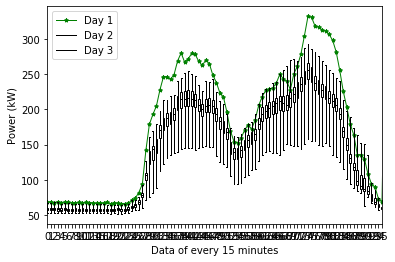

In [42]:
DA1=np.zeros(shape=(1,99))
ZDA1=np.zeros(shape=(PATROND.shape[1],1))  
#UPS MIDETANCO[7,8,16]  VDETANCO[3]*1.2   MIDETANSO[1]
DA1=VDETANCO[3].reshape(1,99)*1.2 
#plt.plot(MIDETANCO[14].reshape(99,1))
#plt.plot(MIDETANCO[20].reshape(99,1))
#plt.plot(VDETANCO[22].reshape(99,1))
#plt.plot(LDETANSO[3].reshape(99,1))
for i in range (PATROND.shape[1]):
   
    ZDA1[i][0]=(DA1[0][i]-MPATROND[i][0])/DSPATROND[i][0]
    MINPATROND[i][0]=ZMINPATROND[i][0]*DSPATROND[i][0]+MPATROND[i][0]
    MAXPATROND[i][0]=ZMAXPATROND[i][0]*DSPATROND[i][0]+MPATROND[i][0]
    
 #COMPARACIÓN DEL PATRÓN
plt.figure("ARITHMETIC MEAN OF THE DEFINITIVE PATTERN") 
plt.xlabel("Data of every 15 minutes")
plt.xscale('linear')
plt.ylabel("Power (kW)")
plt.yscale('linear')
plt.xlim(0,95)            
plt.plot(DA1.T, color='green', linestyle='solid', linewidth=1, marker='*', markerfacecolor='green', markersize=4)
#plt.plot(DA2.T, color='red', linestyle='dashed', linewidth=1, marker='^', markerfacecolor='red', markersize=4)
#plt.plot(DA3.T, color='blue', linestyle='-.', linewidth=1, marker='o', markerfacecolor='blue', markersize=3)
#plt.plot(DA4.T, color='magenta', linestyle=':', linewidth=1, marker='+', markerfacecolor='magenta', markeredgecolor='magenta', markersize=4)
#plt.plot(DA5.T, color='darkorange', linestyle='solid', linewidth=1, marker='s', markerfacecolor='darkorange', markersize=3)
plt.boxplot(PATROND, whis=1000, positions=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98],notch=False, patch_artist=True,
            boxprops=dict(facecolor='white', color='black'), capprops=dict(color='black'), whiskerprops=dict(color='black',linestyle='solid'), flierprops=dict(color='white', markeredgecolor='white'), medianprops=dict(color='black') )
plt.legend(["Day 1", "Day 2", "Day 3"])

In [43]:
###############################################################
##########          CUANTIFICACIÓN ESTADÍSTICA     ############
###############################################################
CATI=np.zeros(shape=(PATROND.shape[1],1))
AZMIN=np.zeros(shape=(PATROND.shape[1],1))
AZMAX=np.zeros(shape=(PATROND.shape[1],1))
ICONF=np.zeros(shape=(PATROND.shape[1],1))
E1=np.zeros(shape=(PATROND.shape[1],1))
E2=np.zeros(shape=(PATROND.shape[1],1))


reg1=0
for i in range (PATROND.shape[1]):

    if (ZMINPATROND[i][0]<ZDA1[i][0]<ZMAXPATROND[i][0]):
        CATI[i][0]=0

    else:
        CATI[i][0]=1
        reg1=reg1+1

    AZMIN[i][0]=st.norm.cdf(ZMINPATROND[i][0])

    
    AZMAX[i][0]=st.norm.cdf(ZMAXPATROND[i][0])

    ICONF[i][0]=AZMAX[i][0]-AZMIN[i][0]

    E1[i][0]=1-ICONF[i][0]


    if (ZDA1[i][0]>1.96):
        if (ZMAXPATROND[i][0]>ZDA1[i][0]):
            E2[i][0]=1-st.norm.cdf(1.96)

        else:
            E2[i][0]=0

    elif (ZDA1[i][0]<-1.96):
        if (ZMINPATROND[i][0]<ZDA1[i][0]):
            E2[i][0]=st.norm.cdf(-1.96)-0 #AZMIN[i][0]

        else:
            E2[i][0]=0

    else:
        E2[i][0]=0

ICONFBP=ICONF.T[0][0:96]

suma=0

reg3=0
for i in range (27):
    if CATI[i][0]==1:
        reg3=reg3+1
reg4=0
for i in range (84,95):
    if CATI[i][0]==1:
        reg4=reg4+1
reg2=reg3+reg4
reg5=0
for i in range (28,83):
    if CATI[i][0]==1:
        reg5=reg5+1
reg6=0
for i in range (28,55):
    if CATI[i][0]==1:
        reg6=reg6+1
reg7=0
for i in range (64,83):
    if CATI[i][0]==1:
        reg7=reg7+1
numreg8=np.zeros(shape=(1,96))
aux=0
for i in range(1,96):
    if DA1[0][i]==DA1[0][i-1]:
        numreg8[0][aux]=numreg8[0][aux] +1
    else:
        aux=aux+1        
        numreg8[0][aux]=0
a=max(numreg8.T)
reg8=a[0]
numreg9=np.zeros(shape=(1,96))
aux=0
for i in range(1,96):
    if (CATI[i][0]==CATI[i-1][0]) & (CATI[i][0]==1):
        numreg9[0][aux]=numreg9[0][aux] +1
    else:
        numreg9[0][aux]=0
        aux=aux+1
a=max(numreg9.T)
reg9=a[0]
if ZDA1[97][0] > ZMAXPATROND[97][0]:
    reg10=1
elif ZDA1[97][0] < ZMINPATROND[97][0]:
    reg10=-1
else:
    reg10=0
if ZDA1[96][0] > ZMAXPATROND[96][0]:
    reg11=1
elif ZDA1[96][0] < ZMINPATROND[96][0]:
    reg11=-1
else:
    reg11=0
if ZDA1[98][0] > ZMAXPATROND[98][0]:
    reg12=1
elif ZDA1[98][0] < ZMINPATROND[98][0]:
    reg12=-1
else:
    reg12=0
reg1=(reg1/96)*100
reg2=(reg2/40)*100
reg3=(reg3/28)*100
reg4=(reg4/12)*100
reg5=(reg5/56)*100
reg6=(reg6/28)*100
reg7=(reg7/24)*100
reg8=(reg8/4)
reg9=(reg9/4)
P1=1/3
P2=1/3
P3=1/6
P4=1/6
t1c=reg1/100
Ic1=np.median(ICONF[0:95])
Ic2=ICONF[96][0]
Ic3=ICONF[97][0]
Ic4=ICONF[98][0]
I2=np.absolute(reg10)
I3=np.absolute(reg11)
I4=np.absolute(reg12)
Icmax=(P1*Ic1)+(P2*Ic2)+(P3*Ic3)+(P4*Ic4)
Ichange=(P1*t1c*Ic1)+(P2*I2*Ic2)+(P3*I3*Ic3)+(P4*I4*Ic4)
IoC=Ichange/Icmax
print("******************************************************************")
print("******************************************************************")
print("******************************************************************")
print("******************************************************************")
print("CONCLUSIONES METODO SAIC")
Concluir.concluciones(reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg9,reg10,reg11,reg12)
print("El indice de cambio es", IoC,)
print("******************************************************************")
print("******************************************************************")
print("******************************************************************")
print("******************************************************************")
print("******************************************************************")

******************************************************************
******************************************************************
******************************************************************
******************************************************************
CONCLUSIONES METODO SAIC
Existe mayor incidencia de datos atipicos en las HNL de la madrugada. Posible carga se quedo conectada en las horas de la madrugada o posible falla o desconexion
No hay prevalencia significativa de consumos anomalos en HL, ni en HNL
La energia consmida es mayor a la del patron. Posible consumo permanente extra durante todo el dia
La potencia mxima consmida es mayor a la del patron. El consumo adicional se extiende a las horas pico
La potencia minima consumida es mayor a la del patron. Consumo extra durante todo el dia, es posible que algo se quede conectado
El indice de cambio es 0.9053770077510371
******************************************************************
**********************************

In [44]:
print("CONCLUSIONES METODO MACHINE LEARNING")


# summarize model.
model.summary()


Ypred = np.round(model.predict(scaler.transform(ZDA1.T)))
import MLCONCLUIR
MLCONCLUIR.concluciones(Ypred.T)
print("******************************************************************")
print("******************************************************************")
print("******************************************************************")
print("******************************************************************")

CONCLUSIONES METODO MACHINE LEARNING
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 99)                9900      
_________________________________________________________________
batch_normalization_1 (Batch (None, 99)                396       
_________________________________________________________________
dropout_1 (Dropout)          (None, 99)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10000     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 33)                3333      
Total params: 23,629
Trainable params: 23,431
Non-trainable params: 198
_________________________________